<a href="https://colab.research.google.com/github/saim-glitch/DSA_in_python/blob/main/LAB06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

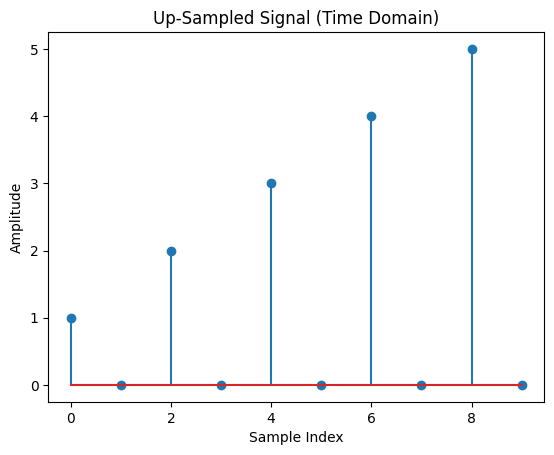

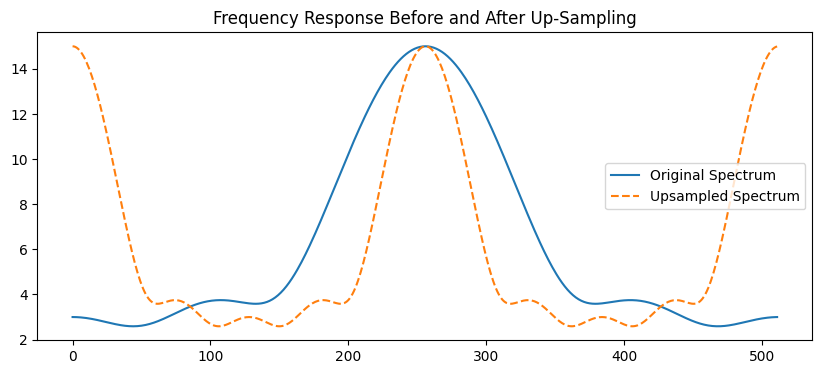

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Original signal
x = np.array([1, 2, 3, 4, 5])
L = 2  # Up-sampling factor

# Insert zeros between samples
upsampled_x = np.zeros(L * len(x))
upsampled_x[::L] = x

# Compute FFT manually
N = 512  # Number of points for FFT
X_f = np.zeros(N, dtype=complex)
Upsampled_X_f = np.zeros(N, dtype=complex)

for k in range(N):
    for n in range(len(x)):
        angle = -2j * np.pi * k * n / N
        X_f[k] += x[n] * np.exp(angle)

    for n in range(len(upsampled_x)):
        angle = -2j * np.pi * k * n / N
        Upsampled_X_f[k] += upsampled_x[n] * np.exp(angle)

# Perform FFT shift manually
def fft_shift_manual(data):
    N = len(data)
    mid = N // 2
    return np.concatenate((data[mid:], data[:mid]))

X_f = fft_shift_manual(abs(X_f))
Upsampled_X_f = fft_shift_manual(abs(Upsampled_X_f))

# Plot upsampled signal in time domain
plt.stem(upsampled_x)
plt.title("Up-Sampled Signal (Time Domain)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()

# Plot frequency response
plt.figure(figsize=(10, 4))
plt.plot(X_f, label='Original Spectrum')
plt.plot(Upsampled_X_f, label='Upsampled Spectrum', linestyle='dashed')
plt.legend()
plt.title("Frequency Response Before and After Up-Sampling")
plt.show()


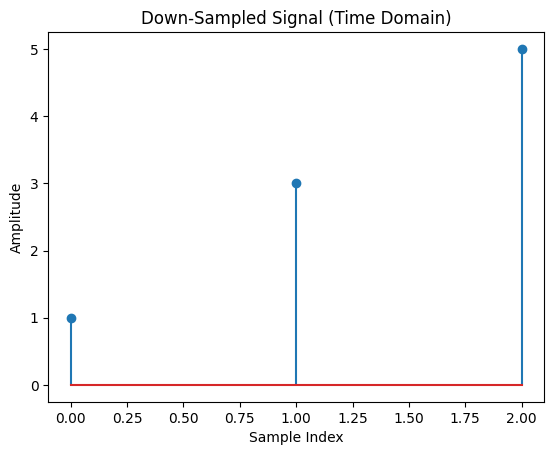

In [2]:
# Original signal
x = np.array([1, 2, 3, 4, 5])
M = 2  # Down-sampling factor

# Keep every Mth sample
downsampled_x = x[::M]

# Plot downsampled signal in time domain
plt.stem(downsampled_x)
plt.title("Down-Sampled Signal (Time Domain)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()


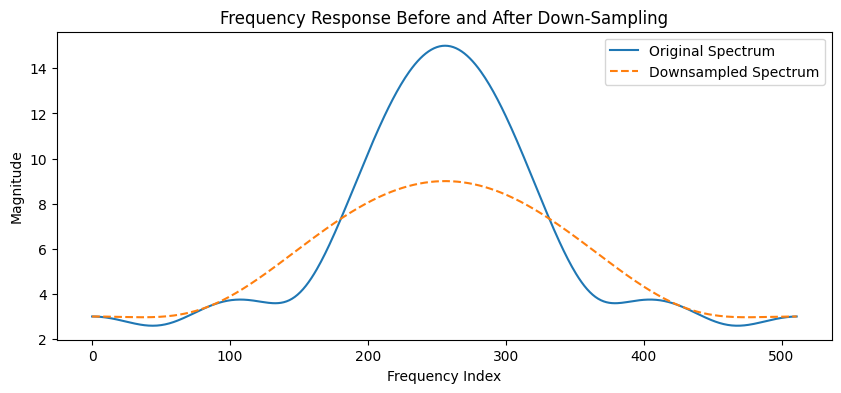

In [3]:

# Original signal
x = np.array([1, 2, 3, 4, 5])
M =2  # Down-sampling factor

# Keep every Mth sample
downsampled_x = x[::M]

# Compute FFT manually
N = 512  # Number of points for FFT
X_f = np.zeros(N, dtype=complex)
Downsampled_X_f = np.zeros(N, dtype=complex)

for k in range(N):
    for n in range(len(x)):
        angle = -2j * np.pi * k * n / N
        X_f[k] += x[n] * np.exp(angle)

    for n in range(len(downsampled_x)):
        angle = -2j * np.pi * k * n / N
        Downsampled_X_f[k] += downsampled_x[n] * np.exp(angle)


def fft_shift_manual(data):
    N = len(data)
    mid = N // 2
    return np.concatenate((data[mid:], data[:mid]))

X_f = fft_shift_manual(abs(X_f))
Downsampled_X_f = fft_shift_manual(abs(Downsampled_X_f))

# Plot frequency response
plt.figure(figsize=(10, 4))
plt.plot(X_f, label='Original Spectrum')
plt.plot(Downsampled_X_f, label='Downsampled Spectrum', linestyle='dashed')
plt.legend()
plt.title("Frequency Response Before and After Down-Sampling")
plt.xlabel("Frequency Index")
plt.ylabel("Magnitude")
plt.show()


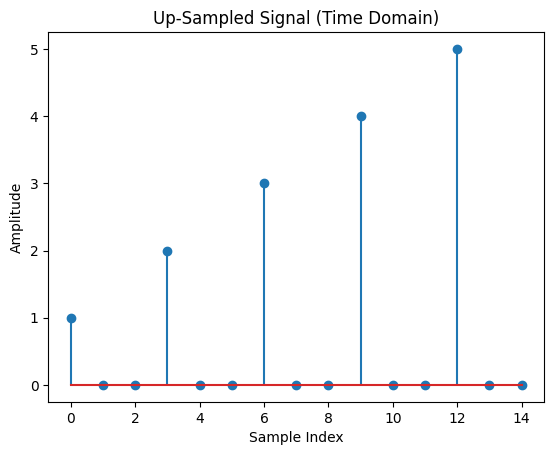

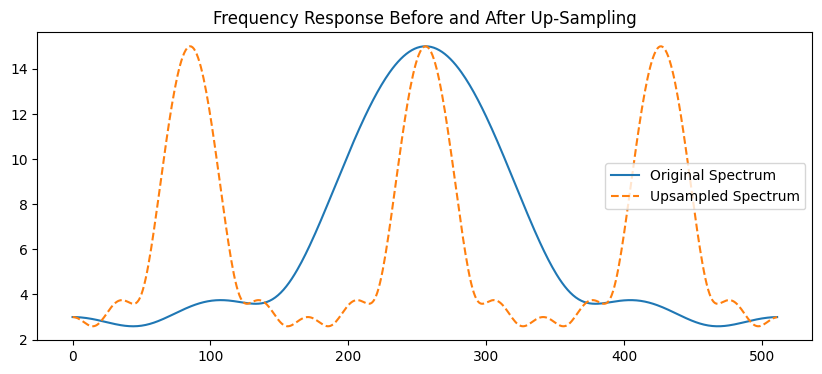

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift
# Original signal
x = np.array([1, 2, 3, 4, 5])
L = 3 # Up-sampling factor
# Insert zeros between samples
upsampled_x = np.zeros(L * len(x))
upsampled_x[::L] = x
# Plot in time domain
plt.stem(upsampled_x,)
plt.title("Up-Sampled Signal (Time Domain)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()
X_f = fftshift(abs(fft(x, 512)))
Upsampled_X_f = fftshift(abs(fft(upsampled_x, 512)))
plt.figure(figsize=(10,4))
plt.plot(X_f, label='Original Spectrum')
plt.plot(Upsampled_X_f, label='Upsampled Spectrum', linestyle='dashed')
plt.legend()
plt.title("Frequency Response Before and After Up-Sampling")
plt.show()

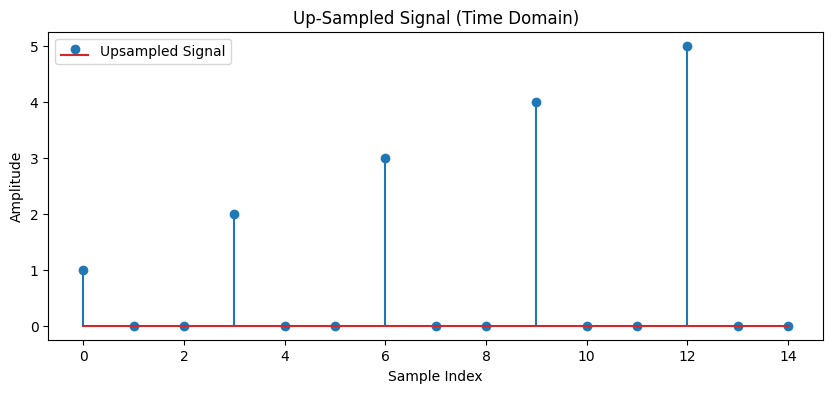

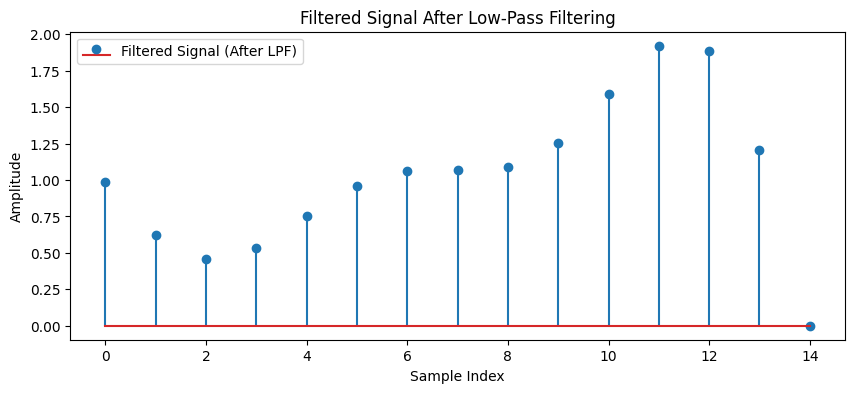

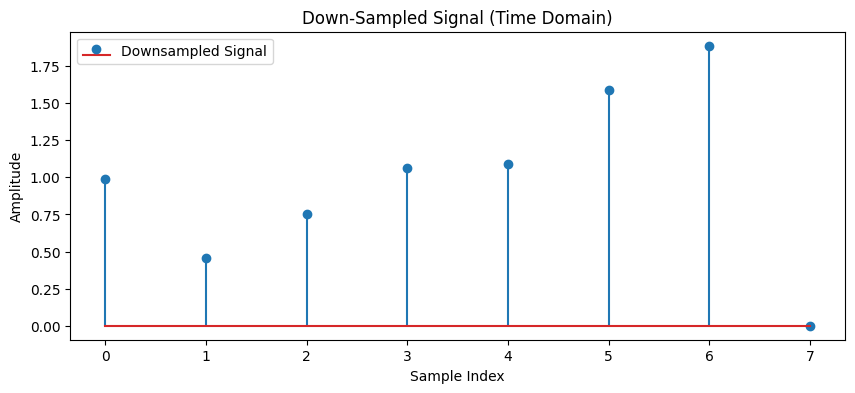

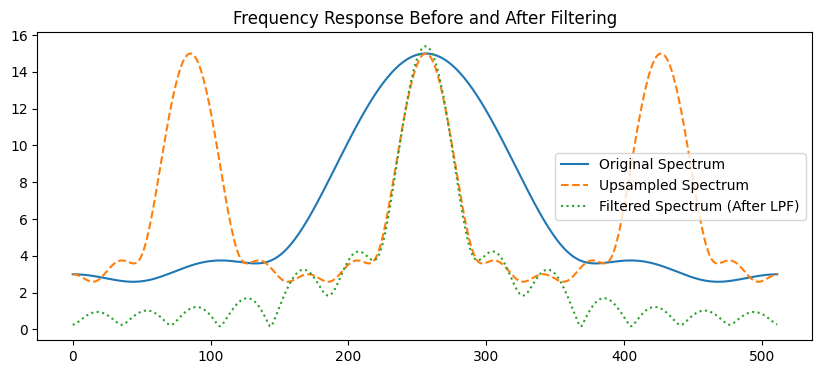

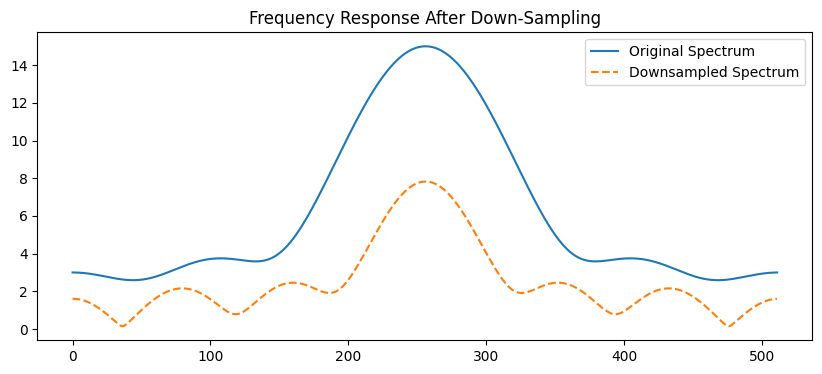

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift
from scipy.signal import butter, filtfilt

# Original signal
x = np.array([1, 2, 3, 4, 5])

L = 3  # Up-sampling factor
M = 2  # Down-sampling factor

# Upsampling: Insert zeros between samples
upsampled_x = np.zeros(L * len(x))
upsampled_x[::L] = x

# Low-pass filter design (Butterworth)
def lowpass_filter(signal, cutoff, fs, order=4):
    nyquist = fs / 2
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    # Adjust padlen to be less than the signal length
    padlen = min(len(signal) - 1, 3 * order)
    return filtfilt(b, a, signal, padlen=padlen) # Pass padlen to filtfilt

# Apply low-pass filter to smooth the upsampled signal
filtered_x = lowpass_filter(upsampled_x, cutoff=0.5, fs=L)

# Downsampling: Keep every M-th sample
downsampled_x = filtered_x[::M]

# ... (rest of the code remains the same)

# Apply low-pass filter to smooth the upsampled signal
filtered_x = lowpass_filter(upsampled_x, cutoff=0.5, fs=L)

# Downsampling: Keep every M-th sample
downsampled_x = filtered_x[::M]

# Frequency analysis
X_f = fftshift(abs(fft(x, 512)))
Upsampled_X_f = fftshift(abs(fft(upsampled_x, 512)))
Filtered_X_f = fftshift(abs(fft(filtered_x, 512)))
Downsampled_X_f = fftshift(abs(fft(downsampled_x, 512)))

# Time-domain plots
plt.figure(figsize=(10, 4))
plt.stem(upsampled_x, label="Upsampled Signal")
plt.title("Up-Sampled Signal (Time Domain)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.stem(filtered_x, label="Filtered Signal (After LPF)")
plt.title("Filtered Signal After Low-Pass Filtering")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.stem(downsampled_x ,label="Downsampled Signal")
plt.title("Down-Sampled Signal (Time Domain)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

# Frequency-domain plots
plt.figure(figsize=(10, 4))
plt.plot(X_f, label='Original Spectrum')
plt.plot(Upsampled_X_f, label='Upsampled Spectrum', linestyle='dashed')
plt.plot(Filtered_X_f, label='Filtered Spectrum (After LPF)', linestyle='dotted')
plt.legend()
plt.title("Frequency Response Before and After Filtering")
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(X_f, label='Original Spectrum')
plt.plot(Downsampled_X_f, label='Downsampled Spectrum', linestyle='dashed')
plt.legend()
plt.title("Frequency Response After Down-Sampling")
plt.show()

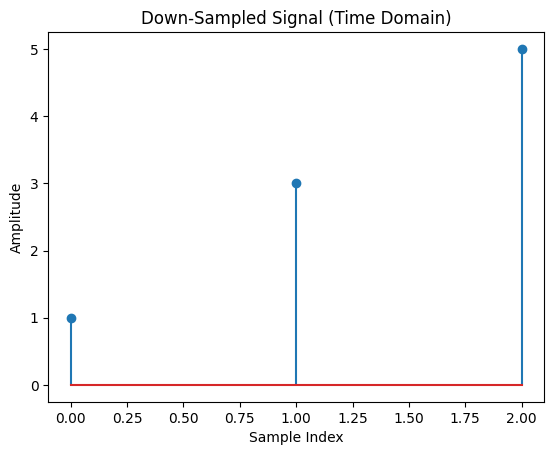

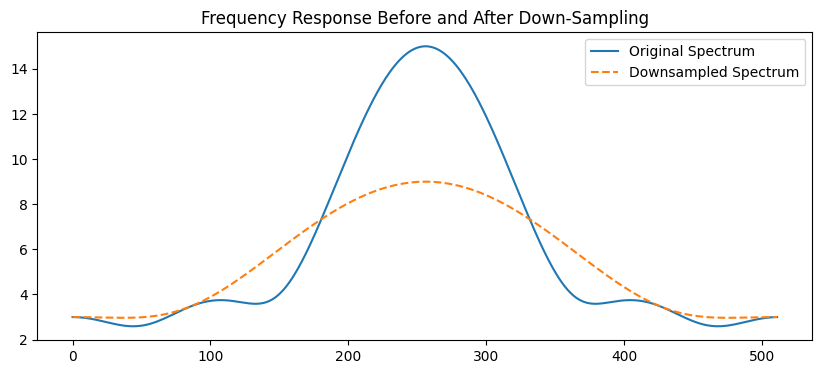

In [6]:
M = 2 # Down-sampling factor
downsampled_x = x[::M] # Keep every Mth sample
# Plot in time domain
plt.stem(downsampled_x,)
plt.title("Down-Sampled Signal (Time Domain)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()
Downsampled_X_f = fftshift(abs(fft(downsampled_x, 512)))
plt.figure(figsize=(10,4))
plt.plot(X_f, label='Original Spectrum')
plt.plot(Downsampled_X_f, label='Downsampled Spectrum', linestyle='dashed')
plt.legend()
plt.title("Frequency Response Before and After Down-Sampling")
plt.show()

Loaded audio: /content/WhatsApp-Audio-2025-03-06-at-11.54.51_1c1233d0.wav at 48000 Hz


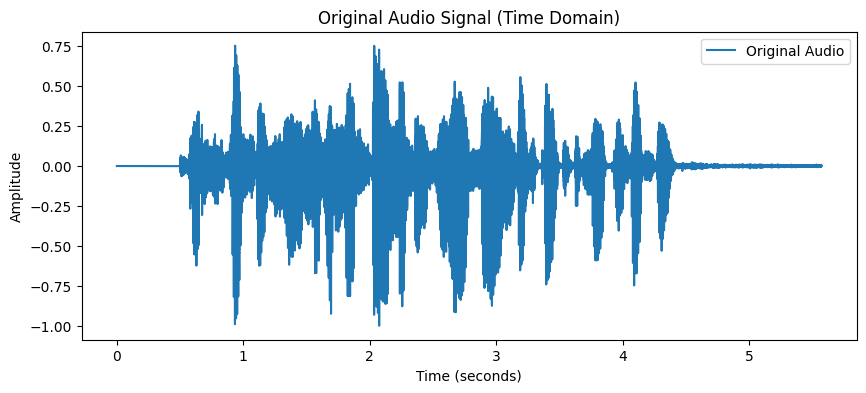

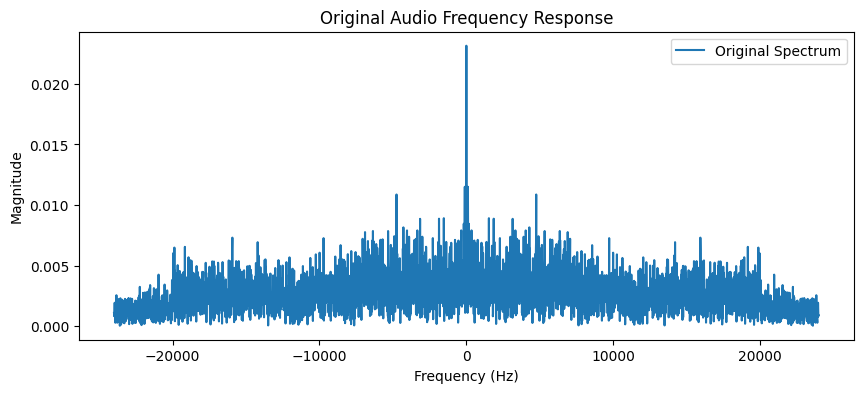

Playing original audio...


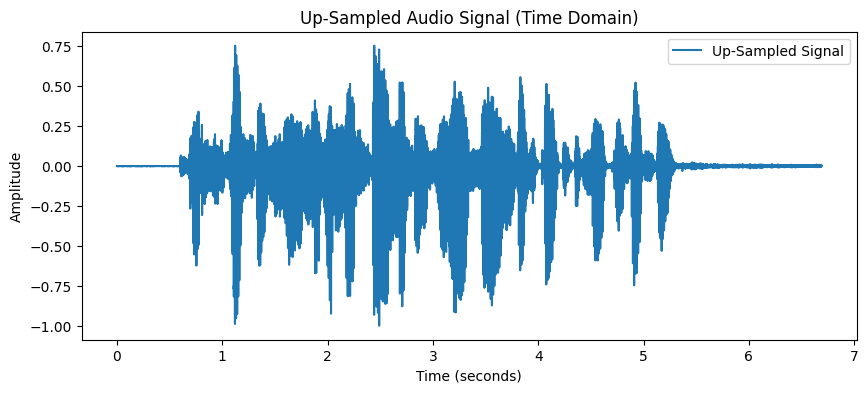

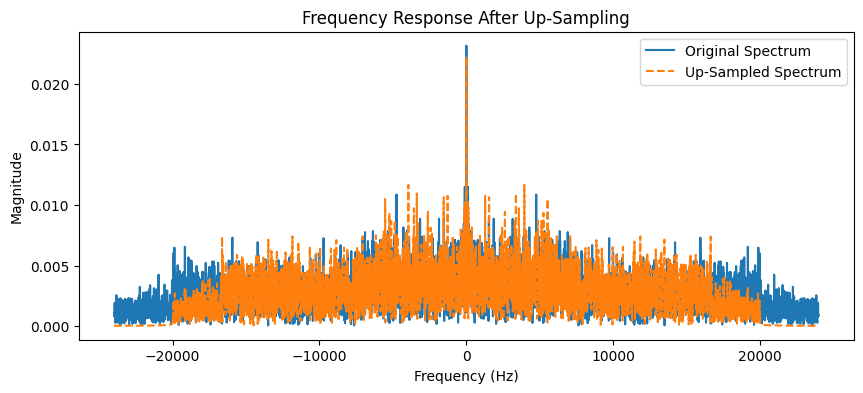

Playing upsampled audio (slightly slower)...


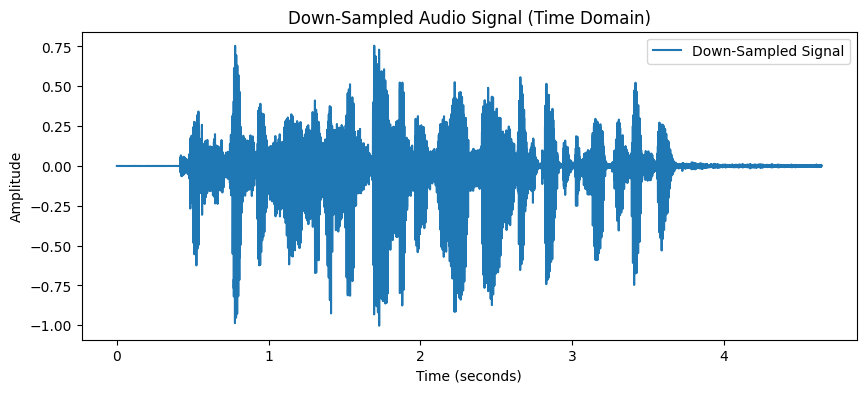

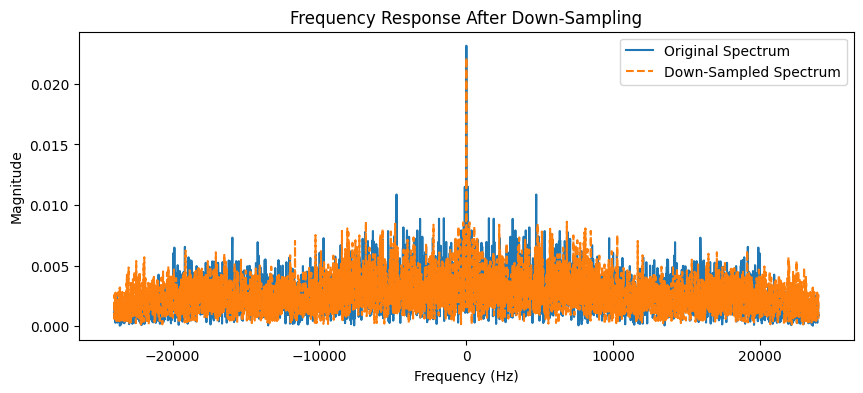

Playing downsampled audio (slightly faster)...


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from scipy.fftpack import fft, fftshift
from scipy.signal import resample, butter, filtfilt
import os
from IPython.display import Audio, display
from tkinter import Tk
from tkinter.filedialog import askopenfilename

# Function to select a file if not found
def get_audio_file():
    print("Please select an audio file...")
    root = Tk()
    root.withdraw()  # Hide the root window
    file_path = askopenfilename(filetypes=[("WAV files", "*.wav")])  # Prompt user for file
    return file_path if file_path else None

# Ask user for an audio file if it doesn't exist
file_path = "/content/WhatsApp-Audio-2025-03-06-at-11.54.51_1c1233d0.wav"  # Default file name

if not os.path.exists(file_path):
    print(f"Error: '{file_path}' not found.")
    file_path = get_audio_file()  # Prompt user to select a file

if file_path and os.path.exists(file_path):
    fs, audio = wav.read(file_path)
    print(f"Loaded audio: {file_path} at {fs} Hz")
else:
    print("No valid file selected. Generating a synthetic audio signal as fallback.")
    fs = 44100  # Default sampling rate
    audio = np.random.randn(10000)  # Generate a random signal

# Convert to mono if stereo
if len(audio.shape) > 1:
    audio = audio[:, 0]

# Normalize audio
audio = audio / np.max(np.abs(audio))

# Time vector for the original signal
t_original = np.linspace(0, len(audio) / fs, len(audio))

# Plot original waveform
plt.figure(figsize=(10, 4))
plt.plot(t_original, audio, label="Original Audio")
plt.title("Original Audio Signal (Time Domain)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

# Compute and plot original frequency spectrum
X_f = fftshift(abs(fft(audio, 4096)))
freqs = np.linspace(-fs/2, fs/2, len(X_f))

plt.figure(figsize=(10, 4))
plt.plot(freqs, X_f, label="Original Spectrum")
plt.title("Original Audio Frequency Response")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.show()

# Enable audio listening for original audio
print("Playing original audio...")
display(Audio(data=audio, rate=fs))

### Up-Sampling (Moderate Slowdown)
L = 1.2  # Up-sampling factor (less delay)
upsampled_audio = resample(audio, int(L * len(audio)))  # Smooth interpolation

# New time vector after upsampling
t_upsampled = np.linspace(0, len(audio) / (fs / L), len(upsampled_audio))

# Plot Up-Sampled Signal in Time Domain
plt.figure(figsize=(10, 4))
plt.plot(t_upsampled, upsampled_audio, label="Up-Sampled Signal")
plt.title("Up-Sampled Audio Signal (Time Domain)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

# Compute upsampled frequency spectrum
Upsampled_X_f = fftshift(abs(fft(upsampled_audio, 4096)))

plt.figure(figsize=(10, 4))
plt.plot(freqs, X_f, label="Original Spectrum")
plt.plot(freqs, Upsampled_X_f, label="Up-Sampled Spectrum", linestyle='dashed')
plt.title("Frequency Response After Up-Sampling")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.show()

# Enable listening to upsampled audio (moderate slowdown)
print("Playing upsampled audio (slightly slower)...")
display(Audio(data=upsampled_audio, rate=int(fs / L)))  # Slightly lower playback rate

### Down-Sampling (Moderate Speed-up)
M = 1.2  # Down-sampling factor (less speed-up)

# Apply a low-pass filter before down-sampling to avoid aliasing
def lowpass_filter(signal, cutoff_freq, fs, order=4):
    nyquist = fs / 2
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, signal)

cutoff = fs / (2 * M)  # Prevent aliasing by filtering before down-sampling
filtered_audio = lowpass_filter(audio, cutoff, fs)

downsampled_audio = resample(filtered_audio, int(len(filtered_audio) / M))

# New time vector after downsampling
t_downsampled = np.linspace(0, len(audio) / (fs * M), len(downsampled_audio))

# Plot Down-Sampled Signal in Time Domain
plt.figure(figsize=(10, 4))
plt.plot(t_downsampled, downsampled_audio, label="Down-Sampled Signal")
plt.title("Down-Sampled Audio Signal (Time Domain)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

# Compute downsampled frequency spectrum
Downsampled_X_f = fftshift(abs(fft(downsampled_audio, 4096)))

plt.figure(figsize=(10, 4))
plt.plot(freqs, X_f, label="Original Spectrum")
plt.plot(freqs, Downsampled_X_f, label="Down-Sampled Spectrum", linestyle='dashed')
plt.title("Frequency Response After Down-Sampling")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.show()

# Enable listening to downsampled audio (moderate speed-up)
print("Playing downsampled audio (slightly faster)...")
display(Audio(data=downsampled_audio, rate=int(fs * M)))  # Slightly higher playback rate